#### Setup
1. go to https://github.com/CSSEGISandData/COVID-19
2. git clone John Hopkins data repository into your Documents folder (only works for Windows, make necessary adjustments if you're on Mac)

In [1]:
# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycountry_convert as pc
import os
import getpass
import subprocess
from datetime import datetime
user = getpass.getuser()
os.chdir("C:/Users/"+user+"/Documents/git/COVID-19")

top_no_countries = 10

In [2]:
# data pulling and date setting
output = subprocess.check_output(["git", "pull"])
cases_data  = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
last_day = cases_data.columns[-1]
week_ago = cases_data.columns[-8]
days_available = cases_data.columns[4:].tolist()
print(last_day)

4/6/20


In [3]:
# adding continent information to the data
missing_countries = {
    "Congo (Brazzaville)": "AF",
    "Congo (Kinshasa)": "AF",
    "Cote d'Ivoire": "AF",
    "Diamond Princess": "AS",
    "Holy See": "AS",
    "Korea, South": "AS",
    "Taiwan*": "AS",
    "Timor-Leste": "AS",
    "West Bank and Gaza": "AS",
    "Kosovo": "EU",
    "Burma": "AS",
    "MS Zaandam": "NA",
    "US": "NA",
    "Western Sahara": "AF"}

eu_countries = ['Austria', 'Italy', 'Belgium', 'Latvia', 'Bulgaria', 'Lithuania', 'Croatia', 'Luxembourg', 'Cyprus', 'Malta',
                'Czechia', 'Netherlands', 'Denmark', 'Poland', 'Estonia', 'Portugal', 'Finland', 'Romania', 'France', 'Slovakia',
                'Germany', 'Slovenia', 'Greece', 'Spain', 'Hungary', 'Sweden', 'Ireland']

continent_names = {
    'EU': 'Europe',
    'NA': 'North America',
    'AS': 'Asia',
    'SA': 'South America',
    'AF': 'Africa',
    'OC': 'Australia and Oceania'
}

def country_to_continent(country):
    if country in missing_countries:
        return continent_names[missing_countries[country]]
    elif country in eu_countries:
        return 'EU27'
    else:
        try:
            return continent_names[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))]
        except:
            print(country)
            return "XX"

cases_data['continent']  = cases_data.apply(lambda x: country_to_continent(x['Country/Region']), axis=1)
deaths_data['continent'] = deaths_data.apply(lambda x: country_to_continent(x['Country/Region']), axis=1)

In [4]:
# continents - cases
continent_cases = cases_data[['continent', week_ago, last_day]]
continent_cases = continent_cases.groupby(['continent']).agg({week_ago: 'sum', last_day: 'sum'})
continent_cases['perc_increase'] = continent_cases.apply(lambda x: x[last_day] / x[week_ago] - 1, axis=1)
continent_cases['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_cases['perc_increase']], index = continent_cases.index)
continent_cases['perc_of_global'] = continent_cases.apply(lambda x: x[last_day] / sum(cases_data[last_day]), axis=1)
continent_cases['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_cases['perc_of_global']], index = continent_cases.index)
continent_cases.sort_values(by=[last_day], ascending=False, inplace=True)

In [5]:
# continents - deaths
continent_deaths = deaths_data[['continent', week_ago, last_day]]
continent_deaths = continent_deaths.groupby(['continent']).agg({week_ago: 'sum', last_day: 'sum'})
continent_deaths['perc_increase'] = continent_deaths.apply(lambda x: x[last_day] / x[week_ago] - 1, axis=1)
continent_deaths['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_deaths['perc_increase']], index = continent_deaths.index)
continent_deaths['perc_of_global'] = continent_deaths.apply(lambda x: x[last_day] / sum(deaths_data[last_day]), axis=1)
continent_deaths['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_deaths['perc_of_global']], index = continent_deaths.index)
continent_deaths.sort_values(by=[last_day], ascending=False, inplace=True)

In [6]:
# countries - cases
countries_cases = cases_data[['Country/Region', week_ago, last_day]]
countries_cases = countries_cases.groupby(['Country/Region']).agg({week_ago: 'sum', last_day: 'sum'})
countries_cases['perc_increase'] = countries_cases.apply(lambda x: x[last_day] / x[week_ago] - 1 if x[week_ago] != 0 else 0, axis=1)
countries_cases['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_cases['perc_increase']], index = countries_cases.index)
countries_cases['perc_of_global'] = countries_cases.apply(lambda x: x[last_day] / sum(cases_data[last_day]), axis=1)
countries_cases['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_cases['perc_of_global']], index = countries_cases.index)
countries_cases.sort_values(by=[last_day], ascending=False, inplace=True)

In [7]:
top_countries = list(countries_cases.head(top_no_countries).index)

In [8]:
# countries - deaths
countries_deaths = deaths_data[['Country/Region', week_ago, last_day]]
countries_deaths = countries_deaths.groupby(['Country/Region']).agg({week_ago: 'sum', last_day: 'sum'})
countries_deaths['perc_increase'] = countries_deaths.apply(lambda x: x[last_day] / x[week_ago] - 1 if x[week_ago] != 0 else 0, axis=1)
countries_deaths['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_deaths['perc_increase']], index = countries_deaths.index)
countries_deaths['perc_of_global'] = countries_deaths.apply(lambda x: x[last_day] / sum(deaths_data[last_day]), axis=1)
countries_deaths['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_deaths['perc_of_global']], index = countries_deaths.index)
countries_deaths.sort_values(by=[last_day], ascending=False, inplace=True)

                       3/30/20  4/6/20 perc_increase perc_of_global
continent                                                          
EU27                    367558  580106        57.83%         43.13%
North America           173026  390761       125.84%         29.05%
Asia                    170152  234100        37.58%         17.40%
Europe                   49297   95834        94.40%          7.12%
South America            12180   27325       124.34%          2.03%
Africa                    5196   10003        92.51%          0.74%
Australia and Oceania     4956    6919        39.61%          0.51%


C:\Users\m.puchala\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


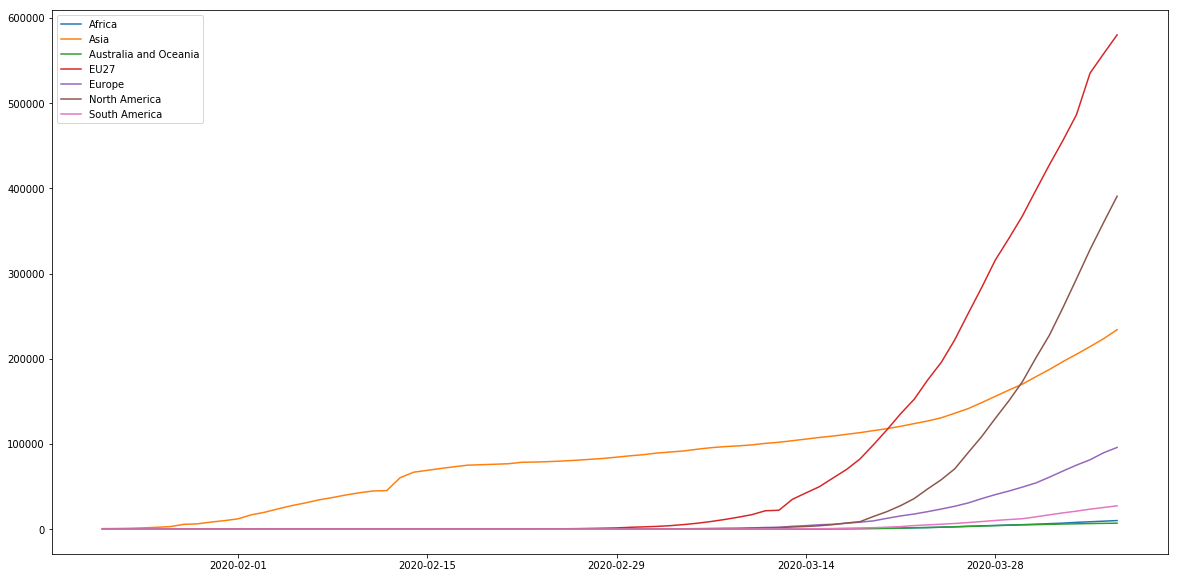

In [9]:
# continent cases - graph
plt.rcParams["figure.figsize"] = (20,10)
continent_cases_graph = cases_data[['continent',] + days_available]
continent_cases_graph = pd.melt(continent_cases_graph, id_vars=["continent"], value_vars = days_available, var_name = 'day', value_name = 'cases')
continent_cases_graph['day'] = continent_cases_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
continent_cases_graph.reset_index(inplace=True)
continent_cases_graph = pd.pivot_table(continent_cases_graph, values=['cases'], columns=['continent'], index=['day'], aggfunc={'cases': np.sum})
for continent in list(continent_cases_graph.columns.levels[1]):
    plt.plot(continent_cases_graph.index, continent_cases_graph['cases'][continent])
plt.legend()
print(continent_cases)

                       3/30/20  4/6/20 perc_increase perc_of_global
continent                                                          
EU27                     25139   46135        83.52%         61.87%
North America             3163   11419       261.02%         15.31%
Asia                      6883    8933        29.78%         11.98%
Europe                    1908    6538       242.66%          8.77%
South America              298    1012       239.60%          1.36%
Africa                     173     487       181.50%          0.65%
Australia and Oceania       18      41       127.78%          0.05%


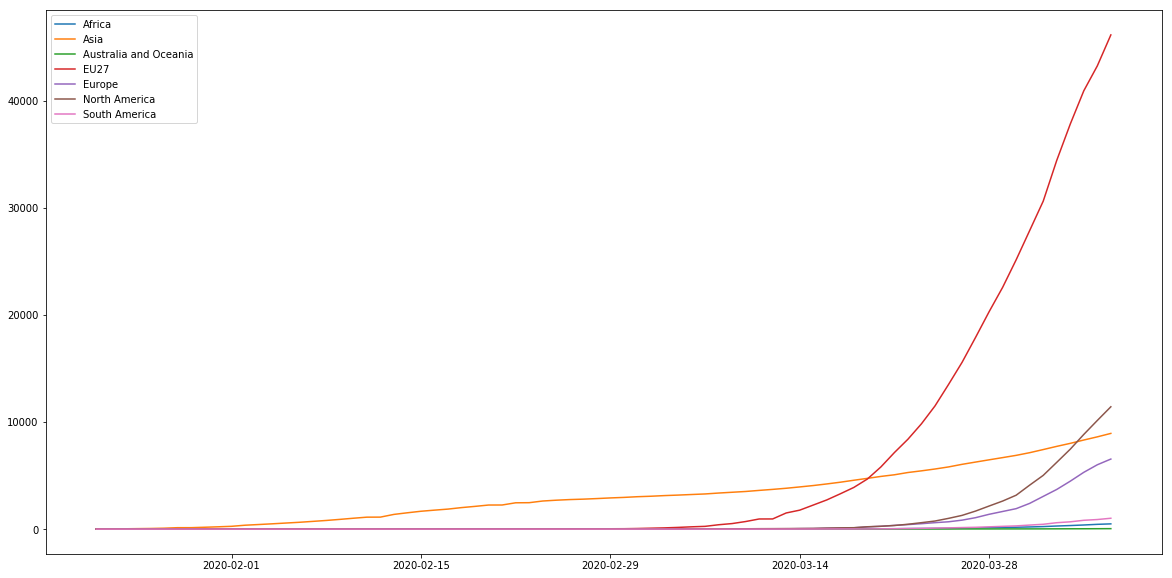

In [10]:
# continent deaths - graph
plt.rcParams["figure.figsize"] = (20,10)
continent_deaths_graph = deaths_data[['continent',] + days_available]
continent_deaths_graph = pd.melt(continent_deaths_graph, id_vars=["continent"], value_vars = days_available, var_name = 'day', value_name = 'cases')
continent_deaths_graph['day'] = continent_deaths_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
continent_deaths_graph.reset_index(inplace=True)
continent_deaths_graph = pd.pivot_table(continent_deaths_graph, values=['cases'], columns=['continent'], index=['day'], aggfunc={'cases': np.sum})
for continent in list(continent_deaths_graph.columns.levels[1]):
    plt.plot(continent_deaths_graph.index, continent_deaths_graph['cases'][continent])
plt.legend()
print(continent_deaths)

                3/30/20  4/6/20 perc_increase perc_of_global
Country/Region                                              
US               161807  366614       126.57%         27.26%
Spain             87956  136675        55.39%         10.16%
Italy            101739  132547        30.28%          9.85%
Germany           66885  103374        54.55%          7.69%
France            45170   98963       119.09%          7.36%
China             82198   82665         0.57%          6.15%
Iran              41495   60500        45.80%          4.50%
United Kingdom    22453   52279       132.84%          3.89%
Turkey            10827   30217       179.09%          2.25%
Switzerland       15922   21657        36.02%          1.61%


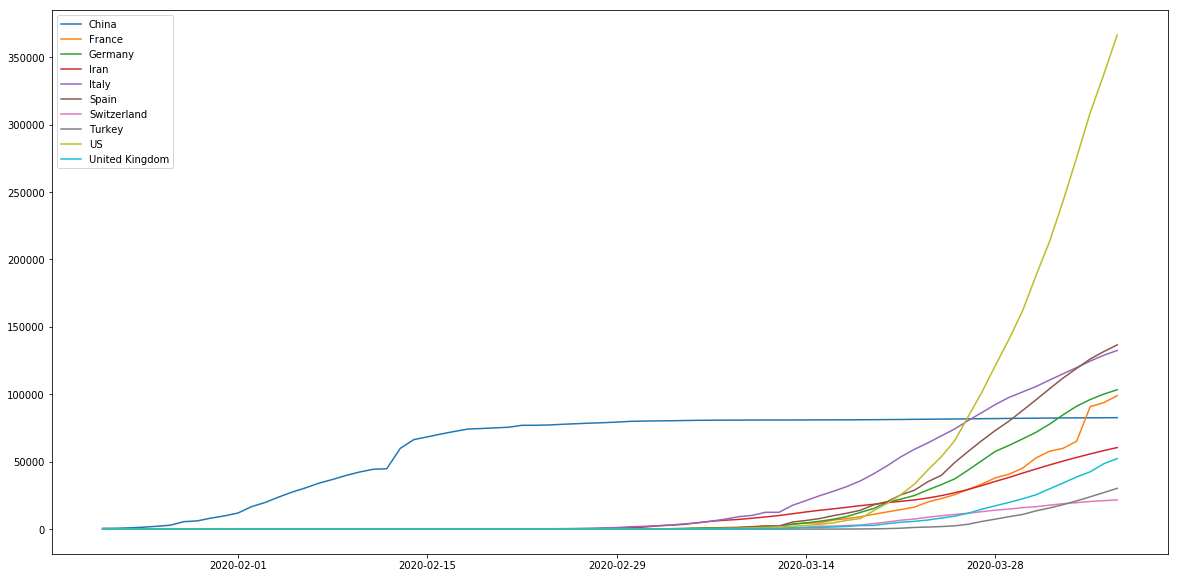

In [11]:
# country cases - graph
plt.rcParams["figure.figsize"] = (20,10)
country_cases_graph = cases_data[cases_data['Country/Region'].isin(top_countries)][['Country/Region',] + days_available]
country_cases_graph = pd.melt(country_cases_graph, id_vars=["Country/Region"], value_vars = days_available, var_name = 'day', value_name = 'cases')
country_cases_graph['day'] = country_cases_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
country_cases_graph.reset_index(inplace=True)
country_cases_graph = pd.pivot_table(country_cases_graph, values=['cases'], columns=['Country/Region'], index=['day'], aggfunc={'cases': np.sum})
for country in list(country_cases_graph.columns.levels[1]):
    plt.plot(country_cases_graph.index, country_cases_graph['cases'][country])
plt.legend()
print(countries_cases.head(top_no_countries))

                3/30/20  4/6/20 perc_increase perc_of_global
Country/Region                                              
Italy             11591   16523        42.55%         22.16%
Spain              7716   13341        72.90%         17.89%
US                 2978   10783       262.09%         14.46%
France             3030    8926       194.59%         11.97%
United Kingdom     1411    5385       281.64%          7.22%
Iran               2757    3739        35.62%          5.01%
China              3308    3335         0.82%          4.47%
Netherlands         865    1874       116.65%          2.51%
Germany             645    1810       180.62%          2.43%
Belgium             513    1632       218.13%          2.19%


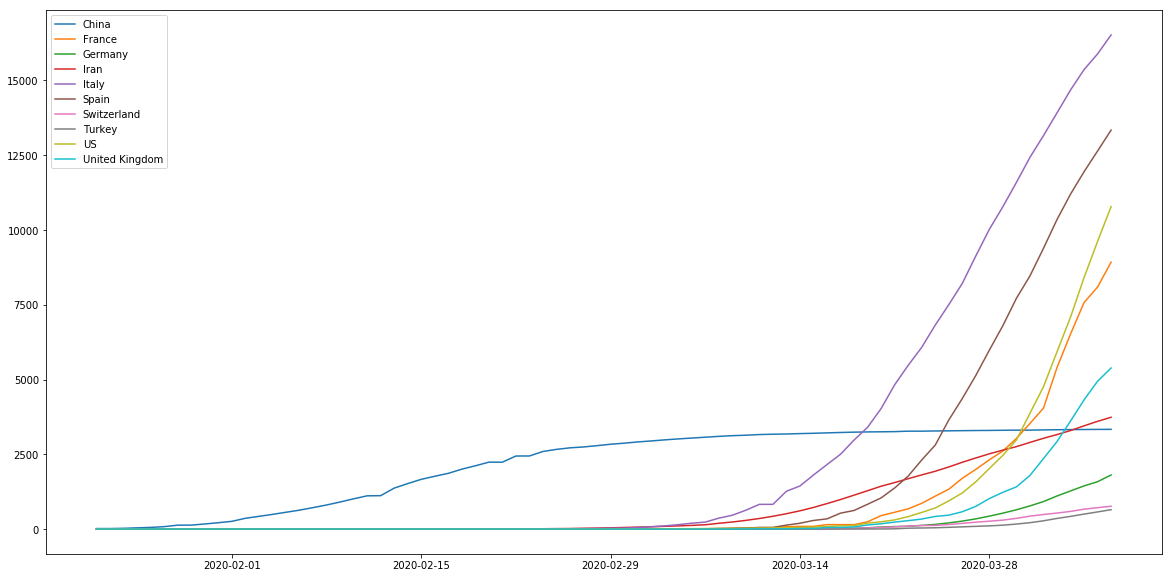

In [12]:
# country deaths - graph
plt.rcParams["figure.figsize"] = (20,10)
country_deaths_graph = deaths_data[cases_data['Country/Region'].isin(top_countries)][['Country/Region',] + days_available]
country_deaths_graph = pd.melt(country_deaths_graph, id_vars=["Country/Region"], value_vars = days_available, var_name = 'day', value_name = 'cases')
country_deaths_graph['day'] = country_deaths_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
country_deaths_graph.reset_index(inplace=True)
country_deaths_graph = pd.pivot_table(country_deaths_graph, values=['cases'], columns=['Country/Region'], index=['day'], aggfunc={'cases': np.sum})
for country in list(country_deaths_graph.columns.levels[1]):
    plt.plot(country_deaths_graph.index, country_deaths_graph['cases'][country])
plt.legend()
print(countries_deaths.head(top_no_countries))